[View in Colaboratory](https://colab.research.google.com/github/rdenadai/img_study_notebooks/blob/master/extract_image_palette.ipynb)

## Extract image color palette

This a simple notebook to create a palette of colors that are most used in some color image.

I build this just for fun to see what are the most common color in Star Wars movie posters... anyway.

**What this notebook don't do:** I'm not trying to use the colors presented here, so there's no maximum filter to eliminated almost identical colors. Colors like rgb(20, 0, 0) and rgb(40, 0, 0) are in anyway merged together, if you want this, feel free to change this code!

In [0]:
from io import BytesIO
import operator
from PIL import Image
import requests
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import cv2

%matplotlib inline

In [0]:
def load_image_from_url(url): 
    try:
        res = requests.get(url)
        if res.status_code == 200:
            img = np.array(Image.open(BytesIO(res.content)))
            x, y, z = img.shape
            if z > 3:
                img = img[:,:,:3]
            return img
    except Exception as e:
        print(e)
    return np.array([])


def get_histogram(img):
    histograms = []
    bins = np.arange(0, 255)
    layers = [img[:,:,0], img[:,:,1], img[:,:,2]]
    for layer in layers:
        hist, edges = np.histogram(layer, bins=bins)
        histograms.append(hist)
    return histograms


def get_color_palette(img, color_step=50, n=20):
    cs = color_step
    palette = {}
    x, y, z = img.shape
    layers = [img[:,:,0].flatten(), img[:,:,1].flatten(), img[:,:,2].flatten()]
    for i in range(0, x * y):
        r, g, b = int(np.floor(layers[0][i] / cs) * cs), \
                    int(np.floor(layers[1][i] / cs) * cs), \
                    int(np.floor(layers[2][i] / cs) * cs)
        name = f'{r},{g},{b}'
        if name in palette:
            palette[name] = palette[name] + 1
        else:
            palette[name] = 1
    palette = sorted((pal for pal in palette.items() if pal[1] > 100), key=operator.itemgetter(1), reverse=True)
    return np.array([[m[0].split(',') for m in palette[:n]]], dtype=np.uint8) 


def presenter(url):
    poster = load_image_from_url(url)

    histograms = get_histogram(poster)
    palette = get_color_palette(poster)

    fig = plt.figure(figsize=(17, 10))
    gs = gridspec.GridSpec(2, 2, hspace=0.2, wspace=0.2)

    ax1 = plt.subplot(gs[:, 0])
    plt.axis('off')
    plt.title('Image')
    plt.imshow(poster)

    ax2 = plt.subplot(gs[0, 1])
    plt.title('Histogram')
    plt.plot(histograms[0], label='red', color='C2')
    plt.plot(histograms[1], label='green', color='C1')
    plt.plot(histograms[2], label='blue', color='C3')
    plt.legend()

    ax3 = plt.subplot(gs[1, 1])
    plt.axis('off')
    plt.title('Palette')
    plt.imshow(palette)

    plt.show()

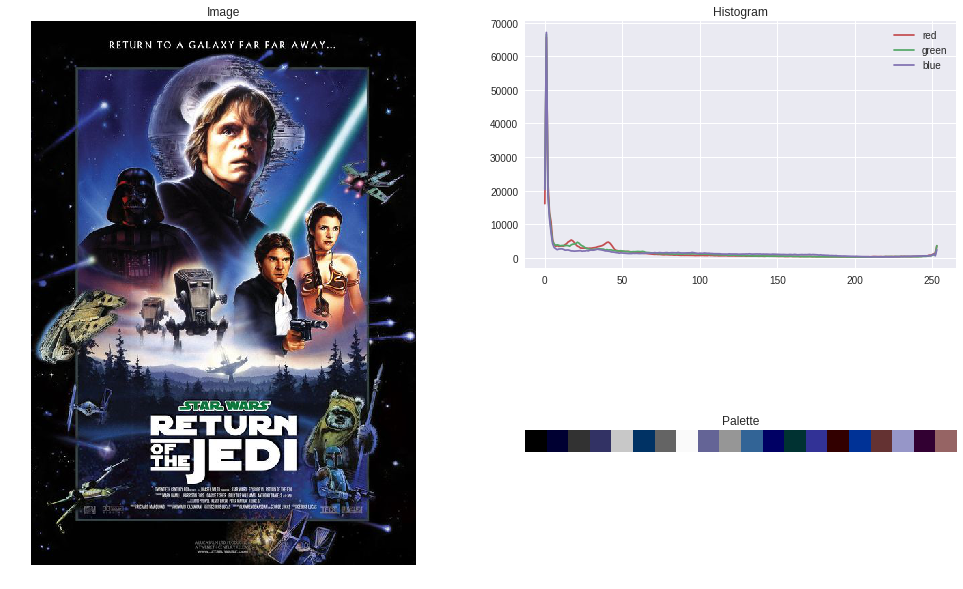

In [259]:
presenter('https://m3.aimg.sk/rs_aktuality/1218154_8141f649d28798347b4e43945c5cefe9')

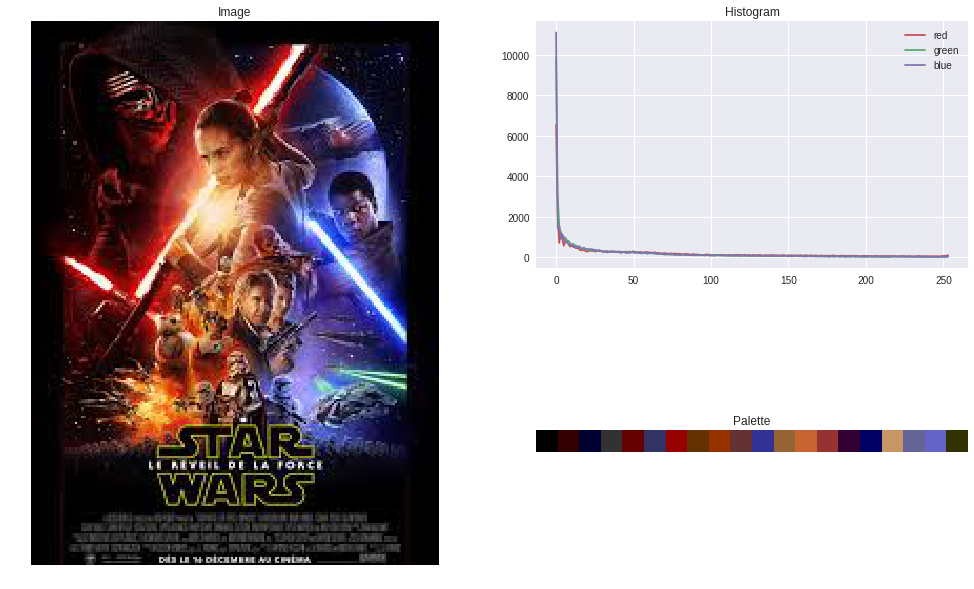

In [258]:
presenter('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS45zHGcv35cJKZLkgTRLQU9PVEqgC301qLZR5k-PrAlpdbd6HJ')

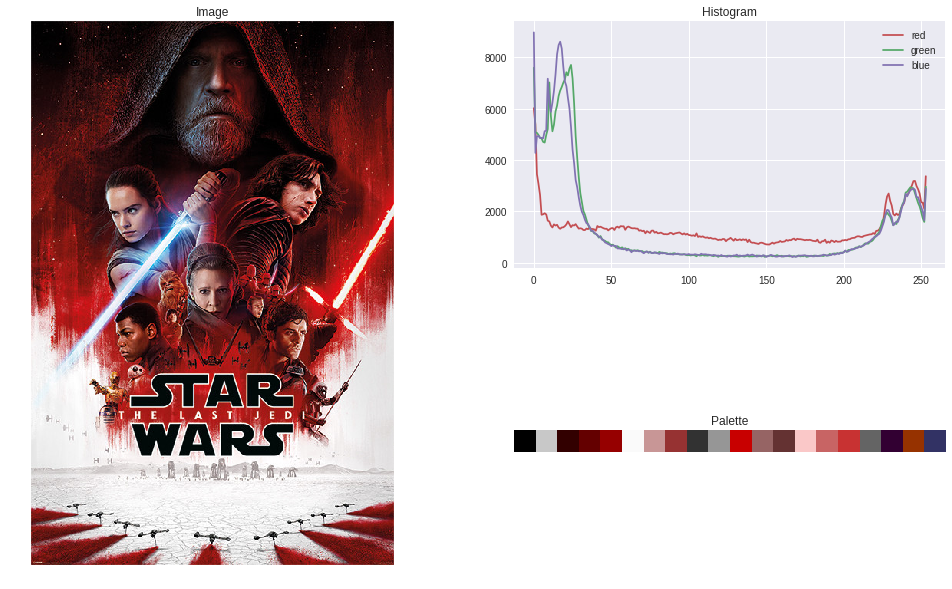

In [250]:
presenter('https://cdn.europosters.eu/image/750/posters/star-wars-the-last-jedi-one-sheet-i51532.jpg')

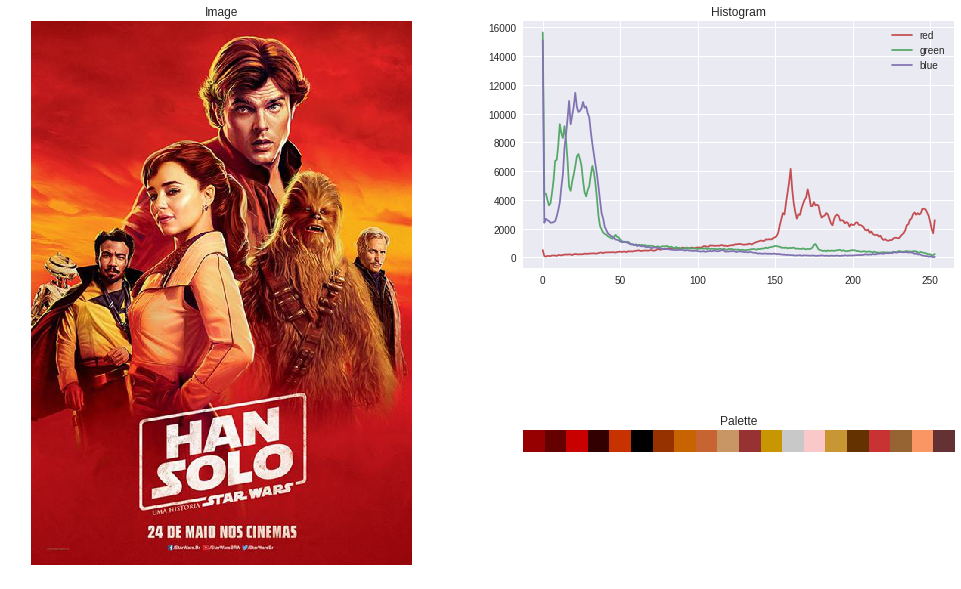

In [251]:
presenter('http://br.web.img3.acsta.net/r_1280_720/pictures/18/03/15/22/08/4393996.jpg')

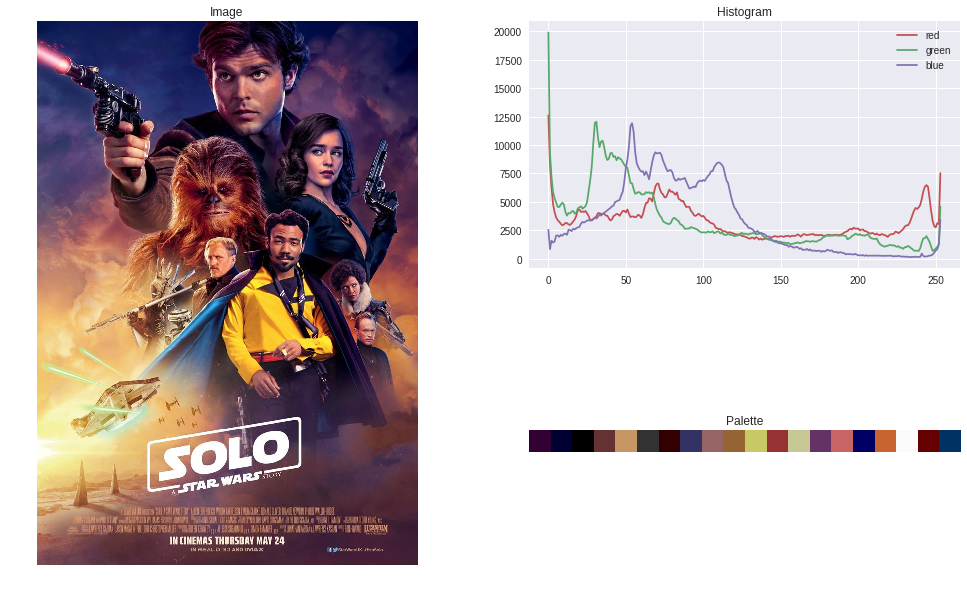

In [255]:
presenter('https://i2.wp.com/makingstarwars.net/wp-content/uploads/2018/04/EA25A177-4D00-4599-BE7B-FBD4F048F5AE.jpeg?fit=770%2C1100&ssl=1')

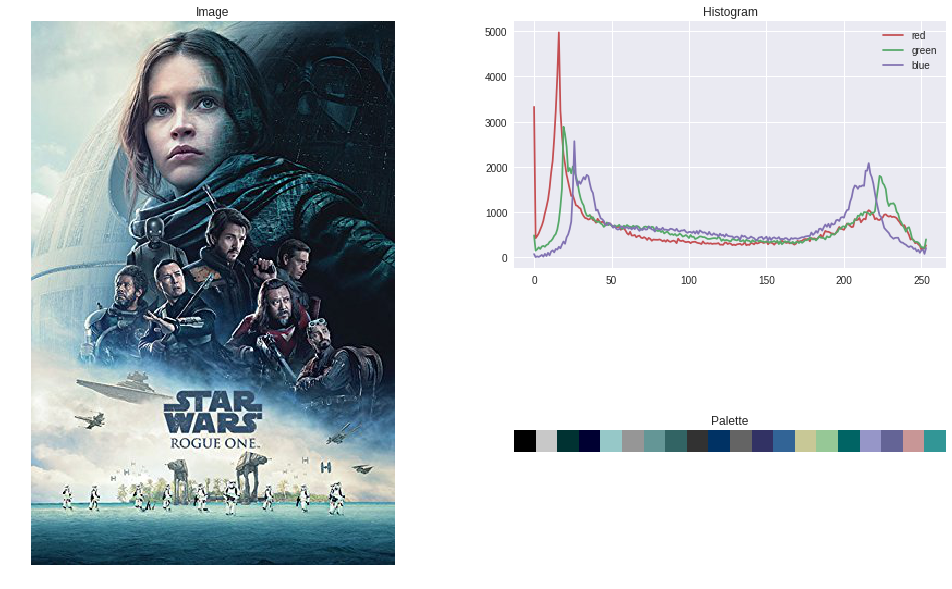

In [252]:
presenter('https://images-na.ssl-images-amazon.com/images/I/51%2Bzb74v-TL.jpg')

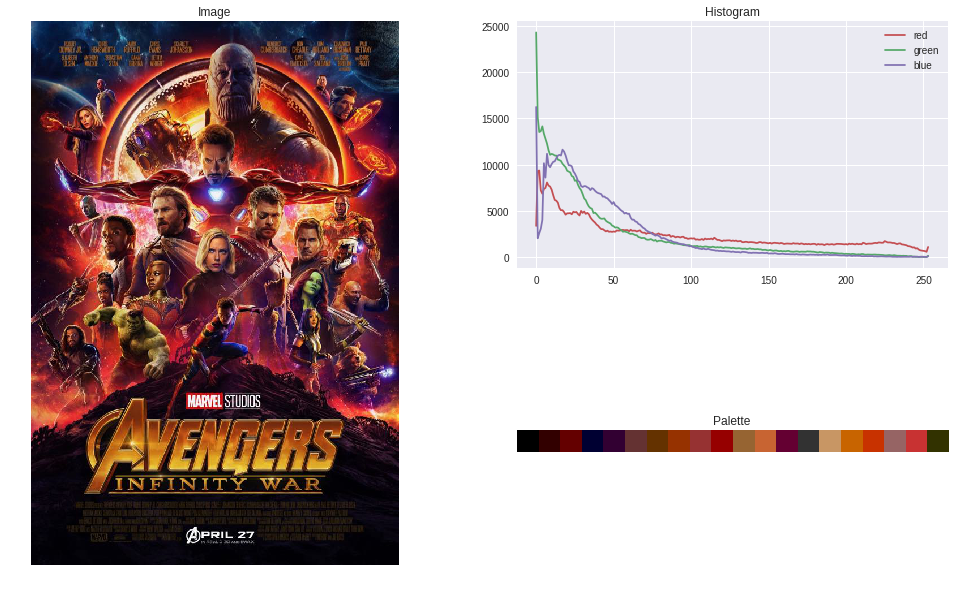

In [256]:
presenter('http://www.entertainmentbuddha.com/blog/wp-content/uploads/2018/03/avengers-infinity-war-poster-new.jpg')

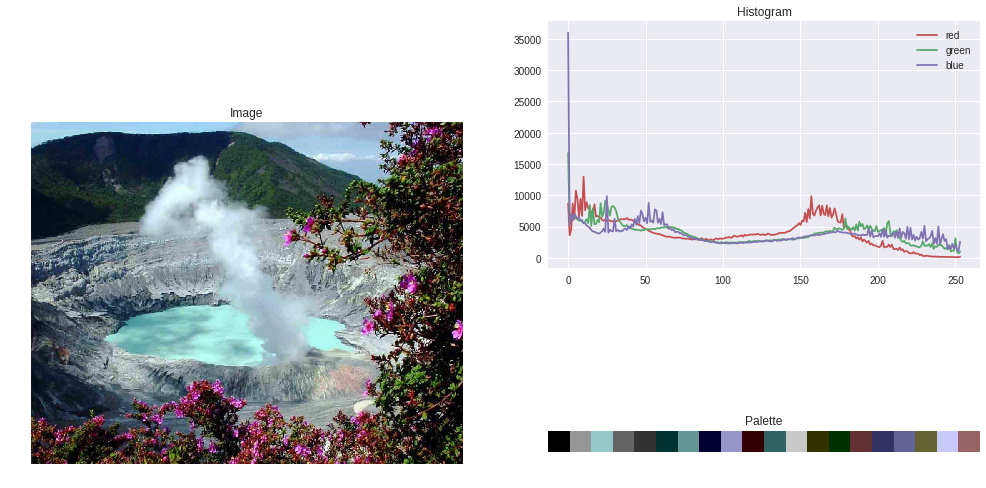

In [253]:
presenter('https://i.pinimg.com/originals/95/14/06/951406e8bf9095f8a68c6cd9c1fdcafa.jpg')

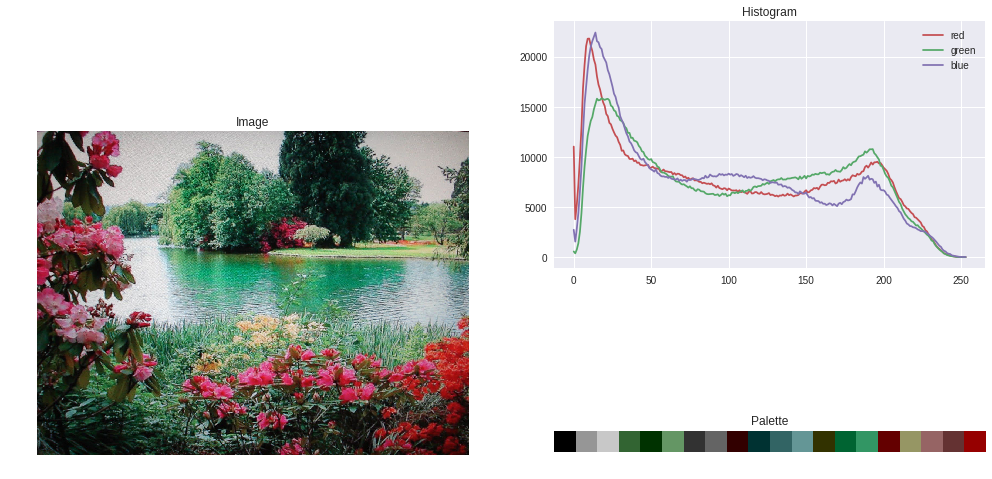

In [254]:
presenter('https://i.pinimg.com/originals/90/24/b9/9024b998165eed8e23ac051207f995e6.jpg')